In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from scipy import optimize
import datetime2
from pandas import Series
from pandas import DataFrame
from pandas import TimeGrouper

In [28]:
def initialize(fileName):
    '''this function reads the file at fileName into a pandas dataframe and creates a variable for the scan range'''
    from scipy import optimize
    global scanSize
    global data
    global wavelength
    global series
    #define variable for number of pixels in scan
    from matplotlib import cm
    #read in csv file to create pandas dataframe
    dataTrans = pd.read_csv(fileName, header = None, sep=',')
    #transpose data to make pixel information contained in the columns
    data = dataTrans.transpose()
    #extract wavelength axis
    wavelength = data[0].copy()
    series = []
    for i in range(1,scanSize,2):
        series.append(data[i])
    scanSize = len(series)
    return print('data loaded')

In [29]:
initialize('Pushing/mos2_PL  7.csv')

data loaded


In [1185]:
def plotSpectra():
    '''plots spectra for forward and reverse scans. Subset of images can be plotted 
    by increasing variable indexStep.'''
    global scanSize
    indexStep = 20
    #plot forward scan spectra 
    for i in range(1,scanSize,indexStep):
        plt.plot(wavelength, series[i])
    plotName = 'Pushing/indirectSpectra'+'.png'
    plt.savefig(plotName)
    plt.show()

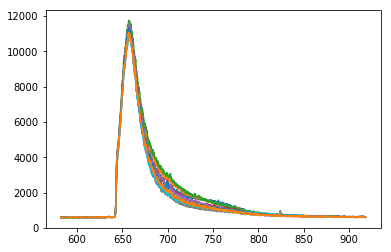

In [1186]:
plotSpectra()

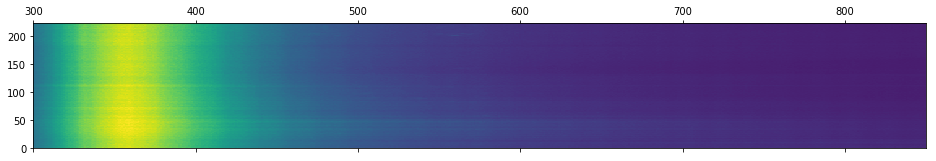

In [277]:
plt.matshow(series, interpolation=None, aspect='auto', vmin = 0, vmax = 12000)
plt.axis([300, 850, 0, 223])
plt.show()

In [194]:
def setRange(specNum,rangeLow,rangeHigh):
    '''plots spectrum number specNum in range rangeLow to rangeHigh'''
    global x_data
    global y_data
    global rangeH
    global rangeL
    %matplotlib inline
    rangeH = rangeHigh
    rangeL = rangeLow
    x_data = wavelength[rangeLow:rangeHigh]
    y_data = series[specNum][rangeLow:rangeHigh]
    # And plot it
    plt.figure(figsize=(6, 4))
    return plt.scatter(x_data, y_data)

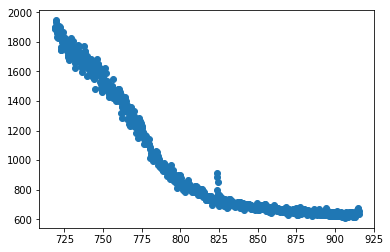

In [271]:
setRange(2, 300, 1590)

In [255]:
def test_func(x, a, b, c, d, e, f, g, h, i, j):
    return a/((x-b)**2 + c**2)+ d/((x-e)**2 + f**2) + g/((x-h)**2 + i**2) + j;

In [256]:
def fitSpectrum2():
    '''fits to one lorentzian with params: int, position, width, offset.'''
    global x_data
    global y_data
    global initParams2
    global paramBounds2
    initParams2=[10000, 655, 30, 10000, 670, 30, 10000, 770, 20, 590]
    paramBounds2=([0, 655, 1, 0, 660, 1, 0, 750, 1, 580],[10000000, 659, 100, 10000000, 690, 100, 10000000, 775, 100, 600])
    params, params_covariance = optimize.curve_fit(test_func, x_data, y_data,p0=initParams2,sigma=None,absolute_sigma=False,check_finite=True,bounds=paramBounds2)
    print(params)
    plt.figure(figsize=(6, 4))
    plt.scatter(x_data, y_data, label='Data')
    plt.plot(x_data, test_func(x_data, params[0], params[1], params[2], params[3], params[4], params[5], params[6], params[7], params[8], params[9]),
            label='Fitted function')
    plt.legend(loc='best')
    return plt.show()

[9.24811787e+05 6.57912747e+02 1.01600206e+01 1.95226057e+06
 6.74215554e+02 3.01638686e+01 5.28914817e+05 7.50000000e+02
 2.93165923e+01 5.80000000e+02]


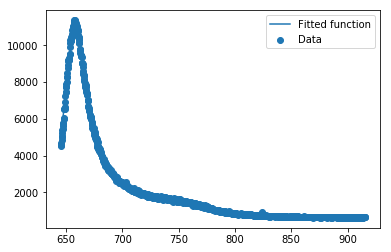

In [257]:
fitSpectrum2()

In [241]:
def fitSpectraSubset(rangeLow,rangeHigh):
    '''fit all reverse spectra to test_func and store fit params in rows of allParamsFor array'''
    global wavelength
    x_data = wavelength[rangeLow:rangeHigh]
    for i in range(0,scanSize,20):
        try:
            y_data = series[i][rangeLow:rangeHigh]
            params, params_covariance = optimize.curve_fit(test_func, x_data, y_data,p0=initParams2,sigma=None,absolute_sigma=False,check_finite=True,bounds=paramBounds2)
            plt.figure(figsize=(6, 4))
            plt.scatter(x_data, y_data, label='Data')
            plt.plot(x_data, test_func(x_data, params[0], params[1], params[2], params[3], params[4], params[5], params[6], params[7], params[8], params[9]),
                label='Fitted function')
            plt.legend(loc='best')
        except RuntimeError:
            print(i)
    return print('finished!')

finished!


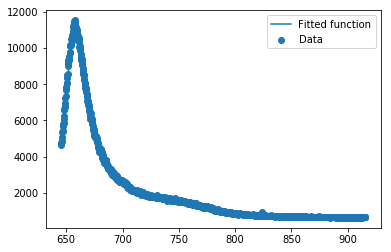

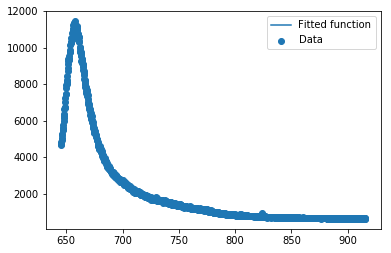

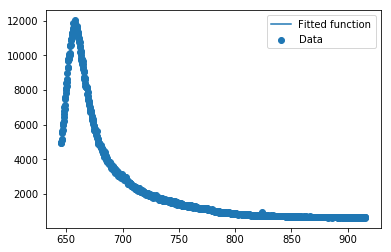

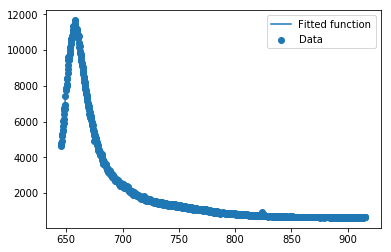

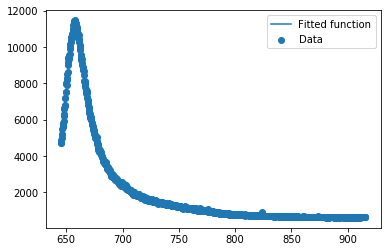

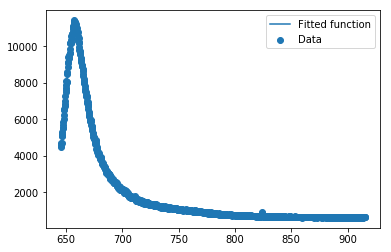

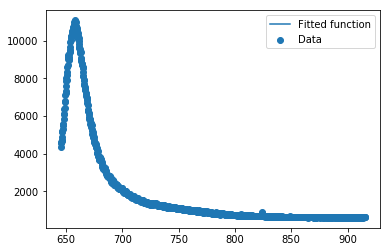

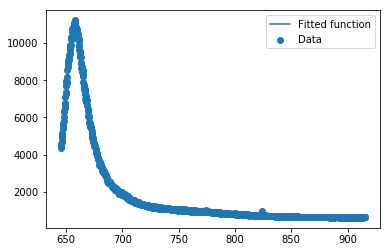

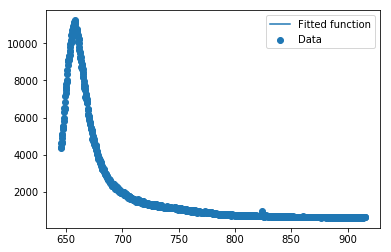

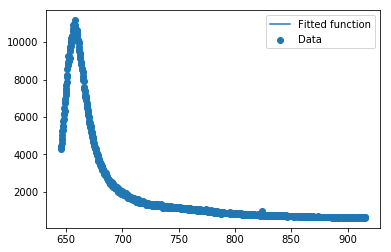

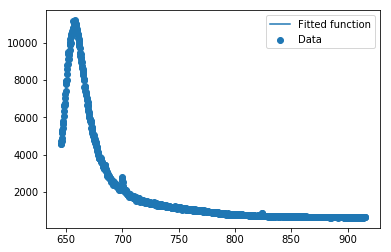

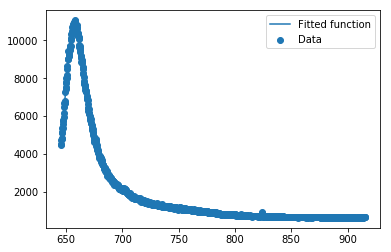

In [242]:
fitSpectraSubset(rangeL,rangeH)

In [258]:
def fitSpectra(rangeLow,rangeHigh):
    '''fit all reverse spectra to test_func and store fit params in rows of allParamsFor array'''
    global allParams
    global wavelength
    allParams = []
    x_data = wavelength[rangeLow:rangeHigh]
    for i in range(0,scanSize):
        try:
            y_data = series[i][rangeLow:rangeHigh]
            params, params_covariance = optimize.curve_fit(test_func, x_data, y_data,p0=initParams2,sigma=None,absolute_sigma=False,check_finite=True,bounds=paramBounds2)
            allParams.append(params)
        except RuntimeError:
            allParamsRev.append([0,0,0,0,0,0,0])
            print(i)
    return print('finished fitting!')

In [259]:
fitSpectra(rangeL, rangeH)

finished fitting!


In [680]:
def plotTimeSeriesParams():
    global allParamsFR
    allParamsFR = pd.DataFrame(allParams)
    plt.figure(figsize=(6, 4))
    plt.scatter(time,allParamsFR[0])
    #plt.axis([0, 223, 500000, 1000000])
    plt.show()
    plt.figure(figsize=(6, 4))
    plt.scatter(time,allParamsFR[1])
    #plt.axis([0, 223, 664, 670])
    plt.show()
    plt.figure(figsize=(6, 4))
    plt.scatter(time,allParamsFR[2])
    #plt.axis([0, 223, 13, 16])
    plt.show()
    plt.figure(figsize=(6, 4))
    plt.scatter(time,allParamsFR[3])
    #plt.axis([0, 223, 500000, 1000000])
    plt.show()
    plt.figure(figsize=(6, 4))
    plt.scatter(time,allParamsFR[4])
    #plt.axis([0, 223, 656, 658])
    plt.show()
    plt.figure(figsize=(6, 4))
    plt.scatter(time,allParamsFR[5])
    #plt.axis([0, 223, 8, 10])
    plt.show()
    plt.scatter(time,allParamsFR[6])
    #plt.axis([0, 223, 500000, 1000000])
    plt.show()
    plt.figure(figsize=(6, 4))
    plt.scatter(time,allParamsFR[7])
    #plt.axis([0, 223, 656, 658])
    plt.show()
    plt.figure(figsize=(6, 4))
    plt.scatter(time,allParamsFR[8])
    #plt.axis([0, 223, 8, 10])
    plt.show()

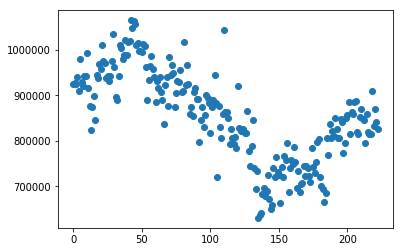

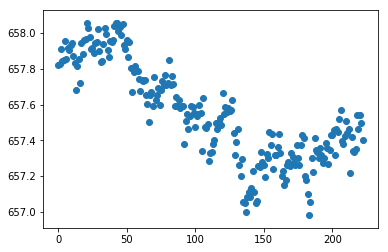

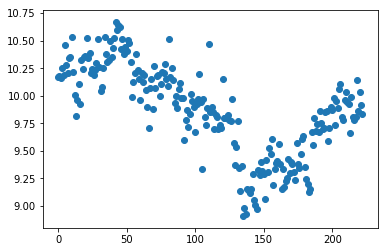

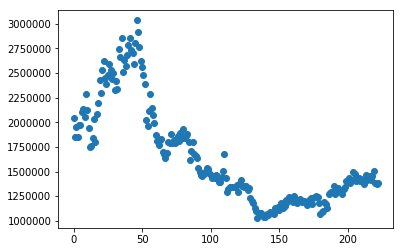

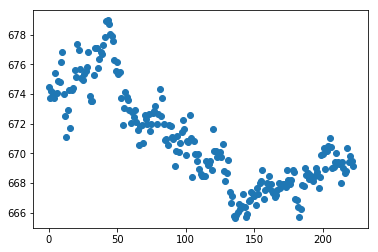

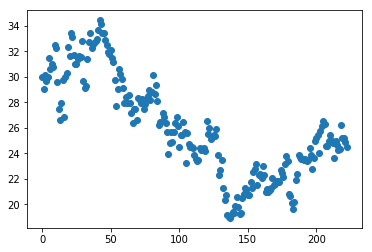

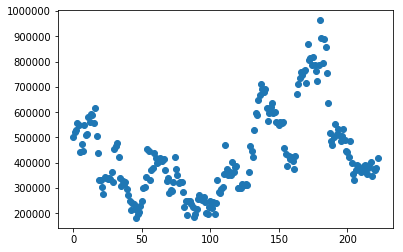

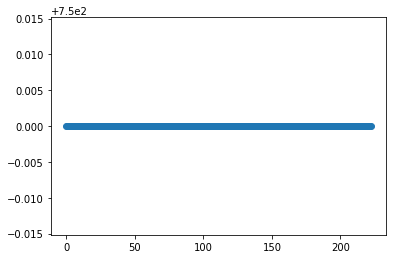

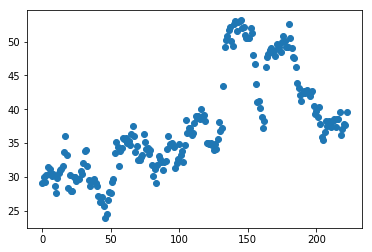

In [681]:
plotTimeSeriesParams()

In [760]:
newTime = list(range(0,223))

In [1117]:
from numpy  import array
intDF = pd.DataFrame(testInt)
timeDF = pd.DataFrame(newTime)
intDropped = intDF.drop(intDF.index[-60:])
timeDropped = timeDF.drop(timeDF.index[-60:])
timeDropped = timeDropped.drop(timeDropped.index[120:133])
intDropped = intDropped.drop(intDropped.index[120:133])
timeDropped = timeDropped.drop(timeDropped.index[123:128])
intDropped = intDropped.drop(intDropped.index[123:128])
timeDropped = timeDropped.drop(timeDropped.index[15:28])
intDropped = intDropped.drop(intDropped.index[15:28])
timeDropped = timeDropped.drop(timeDropped.index[15:17])
intDropped = intDropped.drop(intDropped.index[15:17])
timeDropped = timeDropped.drop(timeDropped.index[75:83])
intDropped = intDropped.drop(intDropped.index[75:83])
timeDropped = timeDropped.drop(timeDropped.index[97:107])
intDropped = intDropped.drop(intDropped.index[97:107])
timeDropped = timeDropped.drop(timeDropped.index[44:45])
intDropped = intDropped.drop(intDropped.index[44:45])
timeDropped = timeDropped.drop(timeDropped.index[39:40])
intDropped = intDropped.drop(intDropped.index[39:40])
timeDropped = timeDropped.drop(timeDropped.index[86:87])
intDropped = intDropped.drop(intDropped.index[86:87])
timeDropped = timeDropped.drop(timeDropped.index[11:15])
intDropped = intDropped.drop(intDropped.index[11:15])
finalTime = range(0,len(timeDropped))
finalInt = intDropped.values
finalInt = finalInt - min(finalInt)
test = finalInt.flatten()
test1 = test.tolist()
test1 = array(test1)
testx = list(range(0,len(timeDropped)))
testx = array(testx)

In [1118]:
def sin_func(x, a, b, c, d, e):
    return a*np.sin(b*x+c)**2+d*x + e

In [1119]:
def fitSpectrumSin():
    '''fits to one lorentzian with params: int, position, width, offset.'''
    global params
    global x_data
    global y_data
    global initParams
    x_data = testx
    y_data = test1
    initParams = [0.3, 0.06, 1.8, 0.001, 0.0]
    #initParams=[0.11, 0.12, 1.8, 0.001, 0.1]
    paramBounds=([-1, -1, -1, -1, -1],[10, 10, 300, 10, 10])
    params, params_covariance = optimize.curve_fit(sin_func, x_data, y_data,p0=initParams,sigma=None,absolute_sigma=False,check_finite=True,bounds=paramBounds)
    params = params.flatten()
    params = params.tolist()
    print(params)
    plt.figure(figsize=(6, 4))
    plt.scatter(x_data, y_data)
    plt.plot(x_data, sin_func(x_data, params[0], params[1], params[2], params[3], params[4]))
    return plt.show()

[0.21768234431108746, 0.07545479980062923, 1.2244595319604148, -0.00045874958081003054, 0.08954199332995548]


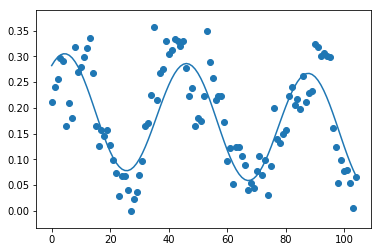

In [1120]:
fitSpectrumSin()

In [1168]:
correctedy = y_data - params[3]*x_data - params[4]
correctedy = (correctedy-min(correctedy))/(max(correctedy) - min(correctedy))
correctedFit = sin_func(x_data, params[0], params[1], params[2], params[3], params[4])- params[3]*x_data - params[4]
correctedFit = 0.7*(correctedFit-min(correctedFit))/(max(correctedFit)-min(correctedFit))+0.13
newTime = pd.DataFrame(x_data)
newTime = (1/10)*newTime

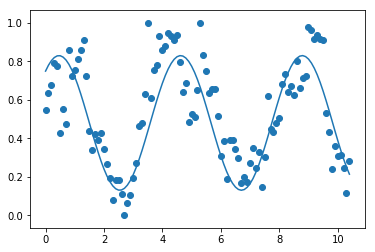

In [1169]:
plt.scatter(newTime, correctedy)
plt.plot(newTime, correctedFit)
plt.show()

In [1139]:
type(correctedFit)

numpy.ndarray

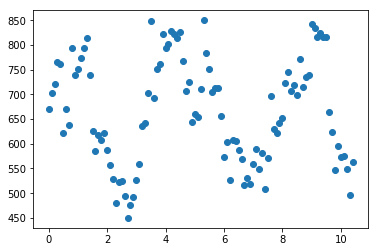

In [1173]:
setPointY = (correctedy*400)+450
plt.scatter(newTime, setPointY)
plt.show()

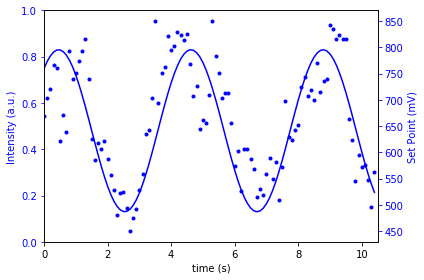

In [1184]:
fig, ax1 = plt.subplots()
t = newTime
s0 = correctedy
s1 = correctedFit
#ax1.plot(t, s0, 'b-')
plt.axis([0, 10.5, 0, 1])
ax1.plot(t, s1, 'b-')
ax1.set_xlabel('time (s)')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Intensity (a.u.)', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
s2 = setPointY
ax2.plot(t, s2, 'b.')
ax2.set_ylabel('Set Point (mV)', color='b')
ax2.tick_params('y', colors='b')

fig.tight_layout()
plotName = 'Pushing/indirectInt'+'.png'
plt.savefig(plotName)

plt.show()

In [1179]:
max(newTime)

0

In [1181]:
len(newTime)

105